In [19]:
"""Eleni Apostolopoulou  July 2021"""

import copy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
from datetime import date
import datetime
today = date.today()
import tabulate

"""We ask the user to provide their gender, age in years, height in meters and weight in kilograms. 
From these we can calculate a daily allowed amount on points to spend on food"""
class person(object): 
    
    _NextID = 1
    
    
    def __init__(self, givenName, givenSurname,givenAge,givenWeight,givenHeight,givenGender):
        if not isinstance(givenName, str):   # checking if name is in string format
            print('Please provide name in a string format')
        else:
            self.__name = givenName
        if not isinstance(givenSurname, str):   # checking if surname is in string format
            print('Please provide surname in a string format')
        else:    
            self.__surname = givenSurname 
        if not isinstance(givenAge, int):   # checking if age is in integer format
            print('Please provide age in integer format')
        else:
            self.__age = int(givenAge)
        self.__height = float(givenHeight) #Height, weight and gender are checked when the user enters their details
        self.__weight = float(givenWeight)
        self.__ID = person._NextID
        self.__gender = givenGender
        
        self.persondata = pd.read_csv (r'account_data.csv')
        
    
    def dailyPoints(self):  # Calculates the allowable daily points
        if self.__age>0 and self.__weight >0 and self.__height >0:  #checking age, weight and height are valid numbers
            if self.__gender == 'f':
                result = (387 - (7.31 * self.__age) + 1.14 * (10.9 * self.__weight + 660.7 * self.__height))
            if self.__gender == 'm':
                result = (864 - (9.72 * self.__age) + 1.12 * (14.2 * self.__weight + 503.0 * self.__height))
            result = 0.9 * result + 200            
            self.calculation = min(max(round(max(result - 1000, 1000) / 35) -7 - 4, 26), 71)
           
            return  self.calculation
        else:
            print('Please enter correct values of age, weight(in kg) and height(in meters)')
    
        
    def storePersonData(self):  #stores user's information in a table for future retrieval
        
        persondata = pd.read_csv (r'account_data.csv')
        self.__ID = max(persondata['id'])+1
        self.dailypoints = self.dailyPoints()
        self.weeklyPoints = copy.deepcopy(self.dailyPoints())
        persondata.loc[-1] = [self.__ID,self.__name , self.__surname,self.__age,self.__weight,self.__height,self.__gender,self.dailypoints, self.weeklyPoints]# adding a row
        persondata.index = persondata.index + 1  # shifting index
        persondata = persondata.sort_index()         
        persondata.to_csv(r'account_data.csv', index = False)  #stores data in account table with general user information
        self.storeDailyData(self.__ID,self.dailypoints,self.weeklyPoints) 
        return self.__ID
    
   
    
    
    def readDailyData(self,ID): #reads and updates daily data only after a person has created a record in the persondata table
        persondata = pd.read_csv (r'account_data.csv')
        filename = "%s.csv" % ID  
        dailyData = pd.read_csv (filename)
        self.runningDailyPoints = dailyData['dailyPoints'].item()
        self.runningWeeklyPoints = dailyData['weeklyPoints'].item()
        format_str = '%d/%m/%Y'
        self.dailyallowedpoints = persondata.loc[persondata['id'] == ID]['dailyPoints'].item()
        self.weeklyallowedpoints = persondata.loc[persondata['id'] == ID]['weeklyPoints'].item()
        lastDateEntered =  datetime.datetime.strptime(dailyData['date'].item(),format_str).date()             
        
        if lastDateEntered == date.today(): #if the last entry was today it reads the records without any changes
            print('Your daily remaining points are:',self.runningDailyPoints)
            print('Your weekly remaining points are:',self.runningWeeklyPoints)
   #If last entry was an older date then it refreshes the daily points to the allowable ones, so that the day start over         
        else: 
            
            self.runningDailyPoints = persondata.loc[persondata['id'] == ID]['dailyPoints'].item()
            self.runningWeeklyPoints = persondata.loc[persondata['id'] == ID]['weeklyPoints'].item()
            print('Your daily remaining points are:',self.runningDailyPoints)
            print('Your weekly remaining points are:',self.runningWeeklyPoints)
            self.storeDailyData(ID,self.runningDailyPoints,self.runningWeeklyPoints)
        #return self.runningDailyPoints,self.runningWeeklyPoints
        
   #stores data in user specific table with data that gets updated daily     
    def storeDailyData(self,givenID,dailyRunningPoints,weeklyRunningPoints):
        self.ID = givenID
        today = date.today()
        
        today = today.strftime('%d/%m/%Y')
        dailyData = pd.DataFrame(data={'id': [self.ID], 'dailyPoints': [dailyRunningPoints], 'weeklyPoints': [weeklyRunningPoints],'date':[today]})
        filename = "%s.csv" % self.ID        
        dailyData.to_csv(filename, index = False)
        
        
  #Gets the daily remaining points, similar to readDailyData but when there is no need for checking      
    def getRunningDailyPoints(self,ID):
        
        filename = "%s.csv" % ID  
        dailyData = pd.read_csv (filename)
        self.runningDailyPoints = dailyData['dailyPoints'].item()
        return self.runningDailyPoints
    

#gets weekly remaining points    
    def getRunningWeeklyPoints(self,ID): 
        filename = "%s.csv" % ID  
        dailyData = pd.read_csv (filename)
        self.runningWeeklyPoints = dailyData['weeklyPoints'].item()
        return self.runningWeeklyPoints
    
    def getWeight(self):
         return self.__weight 
    
    
              
    
    def setWeight(self,givenID,givenWeight):
        if not isinstance(givenWeight, float):   # checking if model is in string format
            print('Please provide a numerical value')
        else:
            self.__weight =  float(givenWeight)
        persondata = pd.read_csv (r'account_data.csv')
        self.__ID=givenID
        self.dailypoints = self.dailyPoints()
        self.weeklyPoints = copy.deepcopy(self.dailyPoints())
        self.persondata.loc[persondata['id'] == self.__ID] = [self.__ID,self.__name , self.__surname,self.__age,self.__weight,self.__height,self.__gender,self.dailypoints, self.weeklyPoints]# ammending a row    
        
        self.persondata.to_csv(r'account_data.csv', index = False)  #stores data in account table with general user information
        print('Your weight has been updated')
        
    
   
    

    
    



In [195]:
persondata = pd.read_csv (r'account_data.csv')
print()

26


In [123]:
persondata = pd.read_csv (r'account_data.csv')
persondata.loc[persondata['id'] == 3] = 


,id,name,surname,age,weight,height,gender,dailyPoints,weeklyPoints
1,3,Eleni,Apost,36,63,1.6,f,26,26


In [2]:
class foodPoints(object):
     _FoodID = 1
     def __init__(self, givenName, givenQuantity, givenMeasure):
        if not isinstance(givenName, str):   # checking if food name is in string format
            print('Please provide food name in a string format')
        else:
            self.foodName = givenName
      
        self.quantity = givenQuantity
        self.measure = givenMeasure
    
    
            
"""We define two separate classes, userCalcPoints and predefinedPoints depending on 
if the points are inputted from a user or stored in a list"""
class userCalcPoints(foodPoints):  #Used to calculate points from nutritional values
    fooddata = pd.read_csv (r'FoodPoints.csv')
    def __init__(self,givenName,givenQuantity, givenMeasure,givenCalories,saturatedFat,givenSugar,givenProtein):
        super().__init__(givenName,givenQuantity, givenMeasure)        
        self.__protein = givenProtein
        self.__kcal = givenCalories
        self.__satFat = saturatedFat
        self.__sugar = givenSugar
        
    def points(self): #stores food by nutritional values
        fooddata = pd.read_csv (r'FoodPoints.csv') 
        self._foodID = max(fooddata['id'])+1
        self.__smartpoints = round((self.__kcal * 0.0305) + (self.__satFat * 0.275) + (self.__sugar * 0.12) - (self.__protein * 0.098))       
        fooddata.loc[-1] = [self._foodID,self.foodName, self.__smartpoints,self.quantity,self.measure]# adding a row
        fooddata.index = fooddata.index + 1  # shifting index
        fooddata = fooddata.sort_index()    
        
        fooddata.to_csv(r'FoodPoints.csv', index = False)
        print(self.foodName, 'has',self.__smartpoints,'points')
        return self.__smartpoints
        print(self.__smartpoints)
    
    
class predefinedPoints(foodPoints): #Used to store points if they are already known
    def __init__(self,givenName,givenPoints, givenQuantity, givenMeasure):
        super().__init__(givenName,givenQuantity, givenMeasure)
        self.__points = givenPoints
        
        
    def points(self):
           
        fooddata = pd.read_csv (r'FoodPoints.csv') 
        self._foodID = max(fooddata['id'])+1
        fooddata.loc[-1] = [self._foodID,self.foodName, self.__points,self.quantity,self.measure]# adding a row
        fooddata.index = fooddata.index + 1  # shifting index
        fooddata = fooddata.sort_index()    
        
        fooddata.to_csv(r'FoodPoints.csv', index = False)
        print(self.foodName, 'has',self.__points,'points')
        return self.__points

In [47]:
food = predefinedPoints('Persimmon', 0,1,'item')
food.points()

Persimmon has 0 points


0

In [33]:
food = userCalcPoints('Tesco cheese thins',21,0.6,0.1,0.5,1,'biscuit')

food.points()

1

In [34]:
fooddata = pd.read_csv (r'FoodPoints.csv')
print (fooddata.head())

                  Food  Points  quantity  measure
0   Tesco cheese thins       1         1  biscuit
1                 fish       0         1  serving
2         Acorn squash       0         1  serving
3  Anchovies, in water       0         1  serving
4               Apples       0         1  serving


In [17]:
class tracker(object):     
    
    def __init__(self,givenID):
        
        self.ID = givenID      

        
    def displayToday(self):
        
       
    # Pie chart to display points used/remaining:
        user1 = loadUser(self.ID)
        user1.readDailyData(self.ID)
        usedPoints = user1.dailyPoints()-user1.getRunningDailyPoints(self.ID)
       
        lbls = 'Used', 'Remaining'
        sizes = [usedPoints,user1.getRunningDailyPoints(self.ID)]
        

    # Intended to serve something like a global variable
        class MyClass:
            i = -1

        def func(pct, labels, vals):
            MyClass.i +=1
            # Returns absolute value against the default percentage
            # absolute = int(pct/100.*np.sum(vals))
            # Combine labels and values
            return "{:s}\n{:.0f} %".format(labels[MyClass.i], pct)

        print("Today's date:",calendar.day_name[today.weekday()] , today)
        print('Points used today are :',usedPoints  )
        fig1, ax1 = plt.subplots()
        # Pie wedgeprops with width being the donut thickness
        ax1.pie(sizes, wedgeprops=dict(width=0.7), autopct=lambda pct: func(pct, lbls, sizes),
                shadow=True, startangle=90)
        sumstr = 'Total = '+str(np.sum(sizes))
        # String on the donut center
        ax1.text(0., 0., sumstr, horizontalalignment='center', verticalalignment='center')
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        plt.show()
        
        
        
        
    
    def updatedailyrecord(self):
        food = input('Please ender the name of the food you would like to track:'  )
        fooddata = pd.read_csv (r'FoodPoints.csv')
        foodlist = fooddata["Food"].str.lower().str 
        contain_values = fooddata[foodlist.contains(food)]   #search engine for finding food points from food records
        if  pd.isna(contain_values).empty:  #If no entry has been found that matches the given name
            print('No such entry available')
            answer = input('Would you like to add a new entry y/n?')
            if answer.lower() == 'y':  #Checks if respones is of the correct format
                addfood()
                displayMenu()
            elif answer.lower() == 'n':
                displayMenu()
            else:
                print('That is not a correct response.') 
                updatedailyrecord()    

        else:    
            print (contain_values)  #Displays all values that match our search term 
            recordID = int(input('Please enter the ID of the record you would like to select.'))
            quantity = int(input('Please enter the amount of the quantity listed you would like'))
            print(recordID)
            points = quantity*self.readpoints(recordID)
            print('You are adding', points,'points to the daily tracker')
            userID = self.ID
            user1 = loadUser(userID)
            remainingDaily = user1.getRunningDailyPoints(userID)
            remainingWeekly = user1.getRunningWeeklyPoints(userID)
            newremaining = remainingDaily - points  #subtracts food points from remaining and calculates new running total

            if newremaining >= 0: #If user has not used up daily allowance the points are stored in their spreadsheet
                user1.storeDailyData(userID,newremaining,remainingWeekly)


                print('Your new remaining points are:')
                tracker(userID).displayToday()
            else: #If the daily allowed points have been used, remaining points are subtracted from weekly allowance and stored

                remainingWeekly =remainingWeekly + newremaining
                newremaining = 0
                print(newremaining,remainingWeekly)

                user1.storeDailyData(userID,newremaining,remainingWeekly)

                print('Your new remaining points are:')
                tracker(userID).displayToday()

            
      
    def readpoints(self,recordID): #reads and updates daily data only after a person has created a record in the persondata table
        fooddata = pd.read_csv (r'FoodPoints.csv')
        fooddata.head()
        points = fooddata.loc[fooddata['id'] == recordID]['Points'].item()
        return points       
      
        
    

### ------------------------------------------------------- Logical Start -------------------------------------------------------------

In [42]:
def login():
    print('Hello,')
    answer = input('would you like to sign up or login?') # Checks if user is new and needs to create a record
    
    if str(answer).lower() == 'sign up':   #In user is new, asks for details and stores them     
        name = input('Please enter your first name:')
        surname = input('Please enter your second name:')
        while True:
            try:
                age = int(input('Please enter your age in years:'))
                break
            except ValueError:
                print("That was no valid number.  Try again...")
        
        
        while True:
            try:
                height = float(input('Please enter your height in meters:'))
                break
            except ValueError:
                print("That was no valid number.  Try again...")
                
        while True:
            try:
                weight = float(input('Please enter your weight in kg:'))
                break
            except ValueError:
                print("That was no valid number.  Try again...")
            
        g = True
        while g == True:
            gender = input('Please enter your gender m/f:')
            if gender.lower() == 'm' or gender.lower() == 'f':
                g = False                 
            else:                
                print('That\'s not a valid option. Try again.')
                
            
           
        user1 = person(name,surname, age, weight,height, gender) #Sets user for the application to read records
        id = user1.storePersonData()
        user1.readDailyData(id)
        print('You have now created a profile') 
        print('Your user ID is:', id)
        Run(id)
        
    elif str(answer).lower() == 'login':    #if existing user, loads records and sets user   
        id = int(input('Please enter your username id:'))
        user1 = loadUser(id)
        loadUser(id).readDailyData(id)
        print('You\'re data has been loaded')
        
        Run(id)
        
    else:
        print('Not a valid answere')
         
        
def loadUser(id): #loads user information to be used throught the application
    personData = pd.read_csv (r'account_data.csv')
    dailyData =  personData.loc[personData['id'] == id].drop(['id','dailyPoints','weeklyPoints'], axis=1).values.tolist()[0]   
    name,surname, age, weight,height, gender = (dailyData[i] for i in range(len(dailyData)))
    user1 = person(name,surname, age, weight,height, gender)     
    return user1
    

    
    
    
    
        
   
    


In [4]:
def addfood(): #calls one of the child classes from the foodPoint class depending on what the user wants to add
    answer = input('Type (n) if you would you like to add a food by entering nutritional values or (p) by entering points?')
    if answer.lower() == 'n': #Used if user wants to add nutritional values
        foodName = input('Please enter the food name:')
        measure = input('Please enter the food measure (eg g/ml/item):')
        
        while True:
            try:
                quantity = int(input('Please enter the quantity:'))
                cal = int(input('Please enter the food\'s energy in kcal:'))
                protein = float(input('Please enter protein:'))
                satFats = float(input('Please enter saturated fats:'))
                sugar = float(input('Please enter sugar:')  )   
                break
            except ValueError:
                print("That was no valid number.  Try again...")
        
       
        
           
        food1 = userCalcPoints(foodName,quantity, measure,cal,satFats,sugar,protein)
        food1.points() 
        
        print('You have now created a food record') 
    elif answer.lower() == 'p':  #used if user already knows the food points
        foodName = input('Please enter the food name:')
        measure = input('Please enter the food measure (eg g/ml/item):')
        quantity = int(input('Please enter the quantity:'))
        points = int(input('please enter food points')) 
        food1 = predefinedPoints(foodName,points, quantity, measure)
        food1.points()
        print('You have now created a food record')
        
        
    else:
        print('Incorrect entry')
        addfood()

In [5]:
   
def changeweight(ID): #Uset to update weight
    givenWeight = float(input('Please enter your new weight in kg: '))
    loadUser(ID).setWeight(ID,givenWeight)

In [6]:
def displayMenu():
    
    print("*********************************")
    print("=========  Food tracking MENU   =========")
    print("*********************************")
    print("What would you like to do today?")
    print("1. Display current available points.")
    print("2. Enter new food items")
    print("3. Update weight")
    print("4. Track new food")
    print("5. Exit")    
    print("\nEnter Choice: ", end = "")    
    
def Run(id):
    Choice = ""
    while Choice != "5":
      displayMenu()
      Choice = input()
      if Choice == "1":
        tracker(id).displayToday()
      elif Choice == "2":
        addfood()
      elif Choice == "3":
        changeweight(id)
        
      elif Choice == "4":
        tracker(id).updatedailyrecord()
      
          
      elif Choice == "5":
        print("Food tracker has finished, press Enter to close.")
        input()
      else:
        print('Not a valid option')

In [7]:
def Main():
    login()

### -------------------------------------------------------Start -------------------------------------------------------------

Hello,
would you like to sign up or login?sign up
Please enter your first name:Freida
Please enter your second name:Kahlo
Please enter your age in years:forty
That was no valid number.  Try again...
Please enter your age in years:40
Please enter your height in meters:two
That was no valid number.  Try again...
Please enter your height in meters:1.6
Please enter your weight in kg:fifty nine
That was no valid number.  Try again...
Please enter your weight in kg:59
Please enter your gender m/f:female
That's not a valid option. Try again.
Please enter your gender m/f:f
Your daily remaining points are: 26
Your weekly remaining points are: 26
You have now created a profile
Your user ID is: 7
*********************************
=========  Food tracking MENU   =========
*********************************
What would you like to do today?
1. Display current available points.
2. Enter new food items
3. Update weight
4. Track new food
5. Exit

Enter Choice: 4
Please ender the name of the food you wou

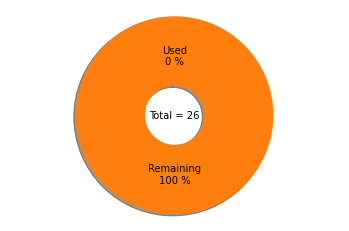

*********************************
=========  Food tracking MENU   =========
*********************************
What would you like to do today?
1. Display current available points.
2. Enter new food items
3. Update weight
4. Track new food
5. Exit

Enter Choice: 

In [ ]:
Main()